# Challenge Problem Week 1

Hepatitis B (HEP B) is a liver infection caused by the hepatitis B virus (HBV). The infection causes inflammation of the liver and if not properly treated, the virus can lead to liver disease such as cirrhosis or liver cancer. 
HEP B is the most primary causes of liver cancer, the one of the leading cause of cancer deaths in the world, therfore making it a major global health problem. HEP B is up to 100 times more infectious than the HIV/AIDS virus. Two billion people (1 in 3) have been infected and more than 292 million people are living with a chronic hepatitis B infection. Although HEP B is treatable and preventable about 884,000 people die each year.

The virus is transmitted through the blood and infected bodily fluids. It can be passed to others through direct contact with blood, unprotected sex, use of illegal drugs, unsterilized or contaminated needles, and from an infected woman to her newborn during pregnancy or childbirth. Most people do not show symptoms and the only way to know you are infected is by getting tested.

![hepb](https://images.onhealth.com/images/slideshow/hepatitis-s1-liver-hepatitis-virus.jpg)

**Goal**: Use the NHANES data set to predict whether a patient has HEP B or not. We want to determine which attributes are the most meaningful to the predictive models. We want to create a balanced model that can predict with a high sensitivity and high specificity while using the **least amount of features**. Essentially is there a way to identify the population of those infected without testing them? 

Source: https://www.hepb.org/what-is-hepatitis-b/what-is-hepb/ 

# National Health and Nutrition Examination Survey NHANES 
To investigate our research problem we will be using the NHANES database. NHANES is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. The survey examines a nationally representative sample of about 5,000 persons each year. These persons are located in counties across the country, 15 of which are visited each year. The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel.

Source: Centers for Disease Control and Prevention (CDC). National Center for Health Statistics (NCHS). National Health and Nutrition Examination Survey Data. Hyattsville, MD: U.S. Department of Health and Human Services, Centers for Disease Control and Prevention, [2019][https://www.cdc.gov/nchs/nhanes/about_nhanes.htm#data].

Below are some general steps to begin analyzing this problem. Apply the new material you learned in class and have fun! (:

1. Import the data  
2. Decide what variables are most relevant  
3. Summary statistics of the data  
4. Data Cleaning (Important!) Note this may a tedious process  
a. Missing data  
b. Transform/Normalize data  
4. Data Visualization  
5. Data analysis  
a. Create dummy variables  
b. Create training and test sets  
c. Statistical methodology  
6. Scoring metrics  
confusion matrix, roc curve  


In [3]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import math
import seaborn as sns

## Import data
Read in the data set and look at the first ten lines

In [342]:
#import data
# Write your code here
dataset = pd.read_csv("/Users/varun/Desktop/BeaverWorks/nhanes_yrs5.csv") 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4161,6598,6599,6601) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [343]:
#dropping unnecessary variables (don't worry about this)
dataset = dataset[dataset.columns.drop(list(dataset.filter(regex='WT')))]
dataset = dataset[dataset.columns.drop(list(dataset.filter(regex='SDM')))]

Awesome, looks like the data loaded in properly. Let's continue by looking at variables that may be predictive of hepatitis B. For beginners, I would suggest conducting a literature review on previous research of hepatitis B.

## Select Features of Interest
Once you have selected some variables in the NHANES data set only looking at what you are interested in. It is in your best interest to rename the variables.

In [348]:
# Write your code here
df = dataset[['LBXHBC', 'DUQ370', 'RIDAGEYR', 'RIDRETH1', "RIAGENDR"] ]
df = df.rename(index = str, columns = {'LBXHBC':'Hep B', 'DUQ370':'Needle', 'RIDAGEYR':'Age', "RIDRETH1":"Ethn", "RIAGENDR": "Gender"})


# create a subset of the data you want to analyze

# rename the variables

Remember the goal is to create a balanced model that can predict with a high sensitivity and high specificity while using the **least amount of features**. Next, we will look at some summary statistics of the variables you chose.

## View summary statistics
Some useful functions in pandas are describe() and info()

In [349]:
# Write your code here
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10149 entries, 0 to 10148
Data columns (total 5 columns):
Hep B     7410 non-null float64
Needle    4128 non-null float64
Age       10149 non-null int64
Ethn      10149 non-null int64
Gender    10149 non-null int64
dtypes: float64(2), int64(3)
memory usage: 475.7+ KB
None



Note the data types are float64, int64 or objects--if there are columns that are obviously numeric like Age but show as objects (or vice versa), we need to change.

## Data Cleaning

Ensure that numeric and categorical variables are coded correctly (turn numeric from strings to numbers).

In [351]:
# Write your code here
df = df[np.isfinite(df['Hep B'])]
df = df[df['Needle']<7]
df = df[np.isfinite(df['Ethn'])]
df = df[np.isfinite(df['Age'])]
df = df[np.isfinite(df['Gender'])]
# df = df[df['Sex']<7]


df['Hep B'] = df['Hep B'].replace(2, 0)
df['Gender'] = df['Gender'].replace(2, 0)
df['Needle'] = df['Needle'].replace(2, 0)
# df['Sex'] = df['Sex'].replace(2, 0)

print(df)

       Hep B  Needle  Age  Ethn  Gender
0        0.0     0.0   62     5       0
4        0.0     0.0   52     1       1
7        0.0     0.0   64     1       1
8        0.0     0.0   66     4       1
10       0.0     0.0   30     2       0
11       0.0     0.0   61     1       0
12       1.0     0.0   27     5       1
14       0.0     0.0   40     1       0
15       0.0     0.0   66     4       0
19       0.0     0.0   40     1       1
20       0.0     0.0   61     3       1
21       0.0     0.0   64     1       0
23       0.0     0.0   68     4       1
27       0.0     0.0   29     1       1
29       0.0     0.0   63     3       1
34       0.0     0.0   48     2       1
35       0.0     0.0   33     3       0
36       0.0     0.0   35     1       1
43       0.0     0.0   50     3       1
48       0.0     0.0   28     4       1
50       0.0     1.0   51     4       1
51       0.0     0.0   64     3       0
52       0.0     0.0   44     3       1
56       0.0     0.0   43     2       1


Notice the counts for the columns are different because of missing values therefore you will have to figure out how to remediate that issue..some suggestions are found in https://scikit-learn.org/stable/modules/impute.html#impute

In [308]:
# Write your code here

# remove, impute, some remedial procedure for NAs 


Lastly, we will convert HEP B into indicator variables

In [309]:
# write your code here


## Data Analysis and Visualization

Take a look at your data. I would suggest doing univariate, bivariate, and multi-variate analysis of most if not all the features you chose.

In [310]:
df.corr()

,Hep B,Needle,Age,Ethn,Gender
Hep B,1.000000,0.136667,0.112618,0.118923,0.024989
Needle,0.136667,1.000000,-0.007899,0.013201,0.078002
Age,0.112618,-0.007899,1.000000,0.052560,-0.004347
Ethn,0.118923,0.013201,0.052560,1.000000,0.025292
Gender,0.024989,0.078002,-0.004347,0.025292,1.000000


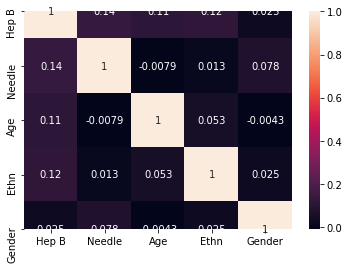

In [311]:
# Write your code here
sns.heatmap(df.corr(), annot=True)

## Preprocessing data

Before we begin to implement a model, we need to prepare the variables that will be used. At this step we convert categorical variables into dummy\indicator variables (https://chrisalbon.com/python/data_wrangling/pandas_convert_categorical_to_dummies/). Additionally, you'll have to normalize and transform variables if necessary.

In [312]:
# creating indicator/dummify for each level of your categorical variable

mydat1 = pd.get_dummies(df, columns=["Needle", "Ethn", "Gender", "Perscribed"])
# mydat1 = pd.get_dummies(df, columns=["Needle"])
mydat1

,Hep B,Age,Needle_0.0,Needle_1.0,Ethn_1,Ethn_2,Ethn_3,Ethn_4,Ethn_5,Gender_0,Gender_1
0,0.0,62,1,0,0,0,0,0,1,1,0
4,0.0,52,1,0,1,0,0,0,0,0,1
7,0.0,64,1,0,1,0,0,0,0,0,1
8,0.0,66,1,0,0,0,0,1,0,0,1
10,0.0,30,1,0,0,1,0,0,0,1,0
11,0.0,61,1,0,1,0,0,0,0,1,0
12,1.0,27,1,0,0,0,0,0,1,0,1
14,0.0,40,1,0,1,0,0,0,0,1,0
15,0.0,66,1,0,0,0,0,1,0,1,0
19,0.0,40,1,0,1,0,0,0,0,0,1


In [313]:
#normalizing age variable

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

norm_data = mydat1.Age.values.reshape(-1, 1)
scaler.fit(norm_data)
mydat1['nAge'] = scaler.transform(norm_data)

#data_unitnorm
#sns.distplot(mydat1['nAge'])

mydat1 = mydat1.drop(['Age'], axis=1)
mydat1.head()

,Hep B,Needle_0.0,Needle_1.0,Ethn_1,Ethn_2,Ethn_3,Ethn_4,Ethn_5,Gender_0,Gender_1,nAge
0,0.0,1,0,0,0,0,0,1,1,0,1.230398
4,0.0,1,0,1,0,0,0,0,0,1,0.520681
7,0.0,1,0,1,0,0,0,0,0,1,1.372341
8,0.0,1,0,0,0,0,1,0,0,1,1.514284
10,0.0,1,0,0,1,0,0,0,1,0,-1.040697


## Model training and selection
Now, let's split our data into training and testing in an 80-20 split, stratified by HEPB distribution (this tries to keep the HEPB distribution approximately equal for the training and test set). For consistency, let's use a random seed 0.

In [314]:
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(mydat1, test_size = 0.20, random_state = 0, stratify = mydat1['Hep B'])


y_train = data_train['Hep B']
y_val = data_val['Hep B']

# only features 
X_train = data_train[["nAge", "Gender_0", "Gender_1", "Ethn_1", "Ethn_2", "Ethn_3", "Ethn_4", "Ethn_5", "Needle_0.0", "Needle_1.0"]]
X_val = data_val[["nAge", "Gender_0", "Gender_1", "Ethn_1", "Ethn_2", "Ethn_3", "Ethn_4", "Ethn_5", "Needle_0.0", "Needle_1.0"]]




X_train.head()

,nAge,Gender_0,Gender_1,Ethn_1,Ethn_2,Ethn_3,Ethn_4,Ethn_5,Needle_0.0,Needle_1.0
5645,-0.543895,0,1,0,0,0,1,0,1,0
2673,-0.898753,1,0,1,0,0,0,0,1,0
9510,0.520681,0,1,0,1,0,0,0,1,0
5771,-1.040697,1,0,0,0,1,0,0,1,0
380,-1.679442,0,1,0,0,1,0,0,1,0


In [315]:
#define the model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
results = logreg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now we can use our training data to create the model and  make predicitons with your test data.

In [316]:
#Write your code here

from sklearn.metrics import auc

# apply the model to test data
y_val_predict = logreg.predict(X_val)
y_val_proba = logreg.predict_proba(X_val)

print(y_val[:5],y_val_predict[:5])

# from sklearn.linear_model import LogisticRegression
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

7931    0.0
1084    0.0
4905    0.0
5263    0.0
9887    0.0
Name: Hep B, dtype: float64 [0. 0. 0. 0. 0.]


# Scoring Metrics
## Confusion Matrix Metrics

There are several useful metrics that are derived from the confusion matrix:

![alt text](https://i.imgur.com/uipmEwt.png)

* sensitivity, **recall**, hit rate, or true positive rate (TPR) : $ \mathrm {TPR} ={\frac {\mathrm {TP} }{P}}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}$
 
* **precision** or positive predictive value (PPV) : $ \mathrm {PPV} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }}$

* specificity or true negative rate (TNR) : $\mathrm {TNR} ={\frac {\mathrm {TN} }{N}}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}$

* miss rate or false negative rate (FNR) : $ \mathrm {FNR} ={\frac {\mathrm {FN} }{P}}={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TP} }}=1-\mathrm {TPR}$

* fall-out or false positive rate (FPR) : $\mathrm {FPR} ={\frac {\mathrm {FP} }{N}}={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TN} }}=1-\mathrm {TNR} $

* accuracy (ACC) : $\mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{P+N}}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$

Now use code below to calculate the confusion matrix.

In [317]:
# write your code here

from sklearn import metrics
from sklearn.metrics import confusion_matrix


# This is exctly the first metric you'll be evaluated on!
# Note: this will only work on the binary case -- you'll need a different method to do multi-class case
def cm_metric(y_true,y_prob):
    
    # predict the class with the greatest probability
    y_pred = [np.argmax(y) for y in y_prob]

    # calculate the confusion matrix
    cm = confusion_matrix(y_true, y_val_predict)

    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return sum(sum(np.multiply(cm_norm,np.array([[1, -2], [-2, 1]]))))

cm_metric(y_val,y_val_proba)

-0.9373601789709172

The model is classifying everything as class 1... Pretty terrible. :( Well maybe there's a threshold where this doesn't happen. Let's look at the AUC ROC.

## AUC ROC

A receiver operating characteristic (ROC) is a probability curve that plots the true positive rate (y) against the false positive rate (x) at many decision threshold settings. The area under the curve (AUC) represents a measure of separability or how much the model is capable of distinguishing between classes. An AUC closer to 1 is desirable as it shows the model is perfectly distinguishing between patients with disease and no disease. A poor model has an AUC $\leq$ 0.50.

In [318]:
#extract fpr and tpr to plot ROC curve and calculate AUC (Note: fpr-false positive rate and tpr -true positive rate)
fpr, tpr, threshold = metrics.roc_curve(y_val, y_val_proba[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
print('AUC: ',roc_auc)

AUC:  0.7828038777032066


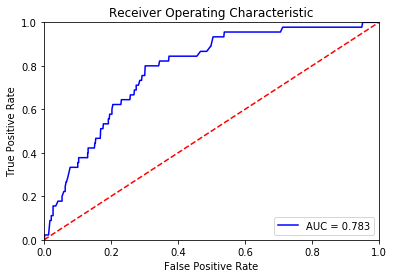

In [319]:
#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [303]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,y_val_proba)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

This model only looks at three possible features and leaves lots of room for improvement!  Try using more features, different models, and see if you can do anything about the data we threw out earlier.

## Economic Cost
Similar to the confusion matrix, we want you to keep in mind the other aspects of healthcare analytics--in this case, economic feasibility. In essence, we want you to minimize the amount of time and money spent on data collection by **reducing the number of features** collected. Each record certainly required a lot of time and money from several individuals and businesses to reliably create, and we hope you gain a better understanding of conducting a useful cost-benefit analysis with this scoring method.  This won't be evaluated quantitatively, but please consider discussing it for your presentation.

For your presentation on Friday, don't foget to mention why you selected the features you used, the model implemented, the scoring metrics mentioned above, and the limitations of your analysis.

# Next steps
For those that finish early, try different classification models such as decision trees, KNN, SVM etc. You can try tackling the multiclass classifier (predicting the different cases instead of simply negative or positive)!

Given the rich data set provided feel free to study a research question of your interest. Have fun! (: